# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2. Dataset Overview__

In [2]:
raw_data = pd.read_csv('./abalone.data')

In [3]:
raw_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
raw_data.shape

(4177, 9)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
raw_data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# __3. Data Preperation__

In [7]:
# Copying the data
data = raw_data.copy(deep=True)

In [8]:
data['Age'] = data['Rings'] * 1.50

In [9]:
data['Age'].unique()

array([22.5, 10.5, 13.5, 15. , 12. , 30. , 24. , 28.5, 21. , 16.5, 18. ,
       27. , 19.5,  7.5,  6. ,  9. , 31.5, 25.5, 33. ,  1.5,  4.5, 39. ,
       34.5, 43.5,  3. , 40.5, 37.5, 36. ])

In [10]:
data = data.drop(columns=['Rings'])

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,22.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,10.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,13.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,15.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,10.5


# __4. Data Exploration__

In [12]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

## __Missing Values__

In [13]:
if data.isnull().any() is True:
    print(data.isnull().sum())
else:
    print("There is no missing values present in this dataset")

There is no missing values present in this dataset


## __Duplicated Values__

In [14]:
if data.duplicated is True:
    print(data.drop_duplicates(inplace=True))
else:
    print("There is no duplicated values present in this dataset")

There is no duplicated values present in this dataset


## __Finding Outliers__

In [15]:
numcols.size

8

In [23]:
a = np.arange(10)

In [26]:
for index, value in enumerate(a):
    print(index, value)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [27]:
numcols

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age'],
      dtype='object')

Text(0.5, 0.98, 'Finding Outliers')

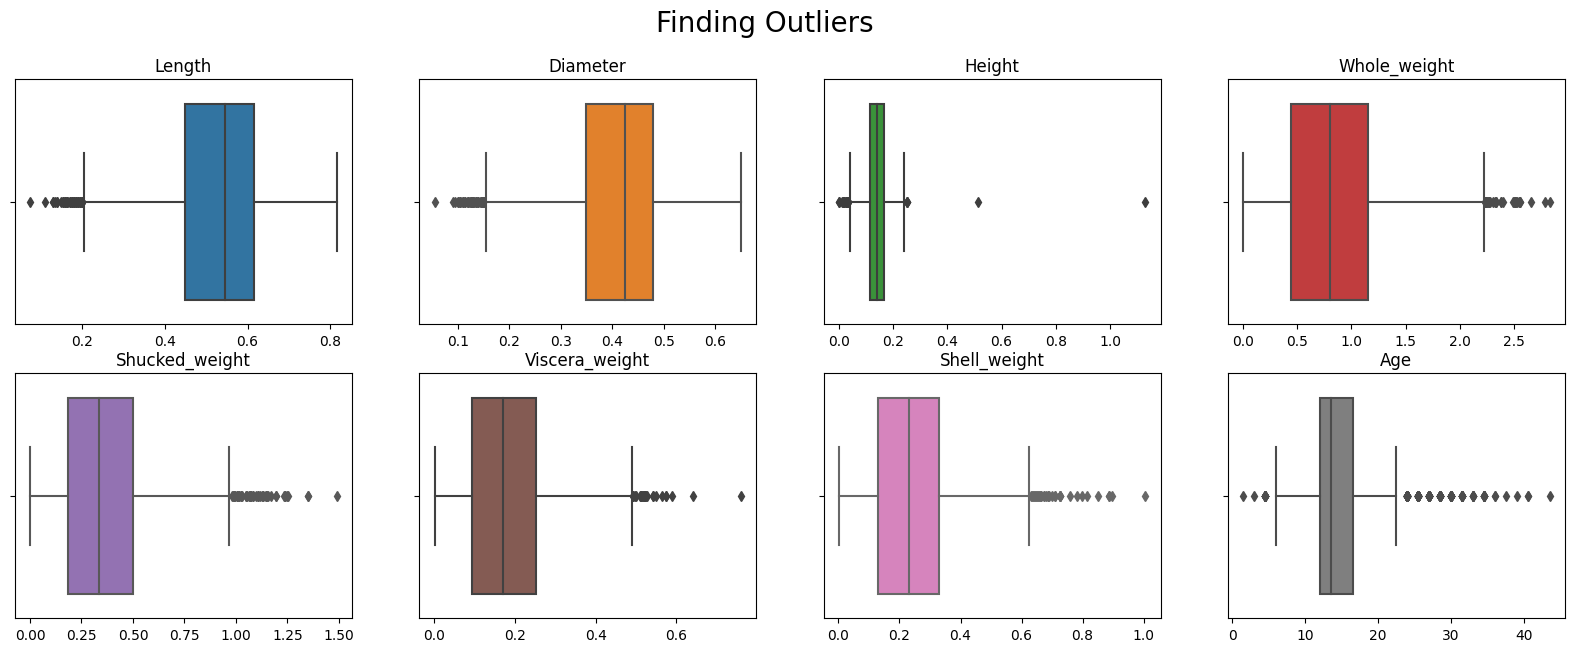

In [34]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,7))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
        )
    axes[index].set_xlabel('')
    axes[index].set_title(column)
plt.suptitle('Finding Outliers', fontsize=20)
plt.tight_layout()

In [17]:
def outliers_zscore(data):
    
    data = sorted(data)

    mean = np.mean(data)

    std  = np.std(data)

    outliers = []
    for i, value in enumerate(data):
        zscore = (value - mean)/std
        if zscore > 3:
            outliers.append(i)
    return outliers

In [18]:
outliers = []

for column in data[numcols]:
    index = list(outliers_zscore(data[column]))
    outliers.extend(index)

data = data.drop(outliers)

In [37]:
len(outliers)/data.shape[0]

0.04106925880923451

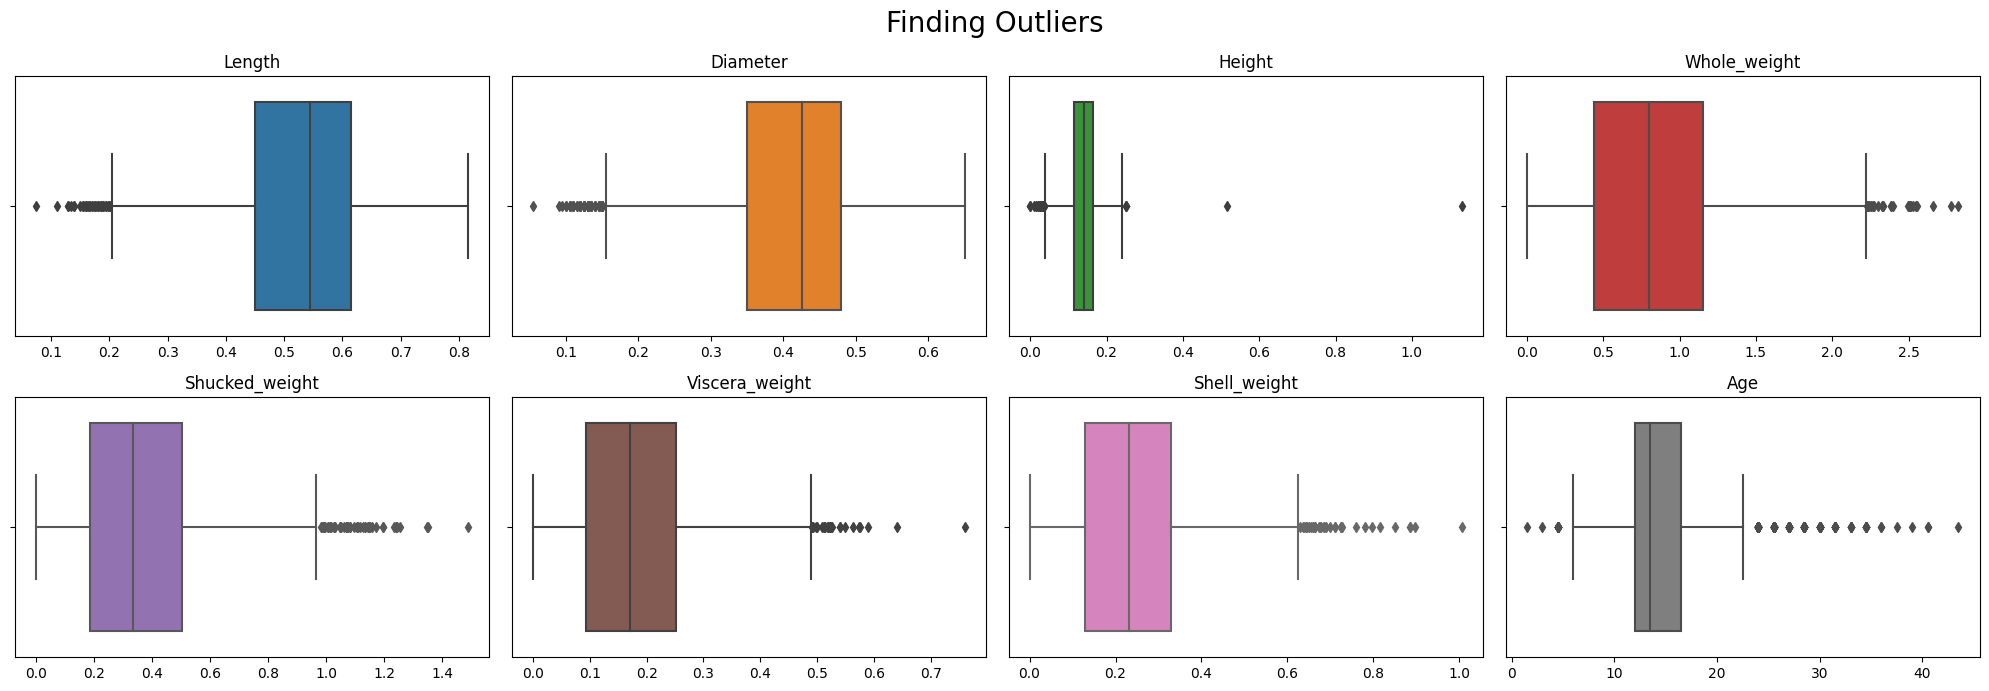

In [38]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,7))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
        )
    axes[index].set_xlabel('')
    axes[index].set_title(column)
plt.suptitle('Finding Outliers', fontsize=20)
plt.tight_layout()